In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Census track data

In [13]:
# Build Census track dataframe reading csv file exported from shapefile
datac = "~/Git/Resolution/SC2010_CEM_RMSP_Income_Race.csv"
dfc = pd.read_csv(datac)
dfc.head()

,ID,AREA,CODSETOR,COD_GR,NOM_GR,COD_UF,NOM_UF,COD_ME,NOM_ME,COD_MI,...,DR_005,DR_006,DR_007,DR_008,DR_009,DR_010,DR_011,DR_012,DR_013,DR_014
0,14525,NaN,354680105000071,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,2.0,3.0,14.0,8.0,2.0,0.0,0.0,0.0,0.0,17.0
1,14522,NaN,354680105000072,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,1.0,1.0,20.0,11.0,5.0,1.0,0.0,0.0,0.0,2.0
2,14523,NaN,354680105000074,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,0.0,3.0,15.0,28.0,11.0,2.0,0.0,1.0,0.0,2.0
3,14521,6267509.5,354680105000075,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,1.0,6.0,15.0,21.0,10.0,0.0,2.0,0.0,0.0,3.0
4,15873,NaN,354680105000076,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,1.0,18.0,83.0,57.0,13.0,3.0,1.0,2.0,1.0,3.0


## Income classes in function of frequency sum

In [14]:
# slice income columns and sum each column
income = dfc.loc[:,'DR_005':'DR_014']
income.sum()

DR_005      36107.0
DR_006     172712.0
DR_007     706901.0
DR_008    1543237.0
DR_009    1620669.0
DR_010     595394.0
DR_011     495462.0
DR_012     388686.0
DR_013     197177.0
DR_014     334082.0
dtype: float64

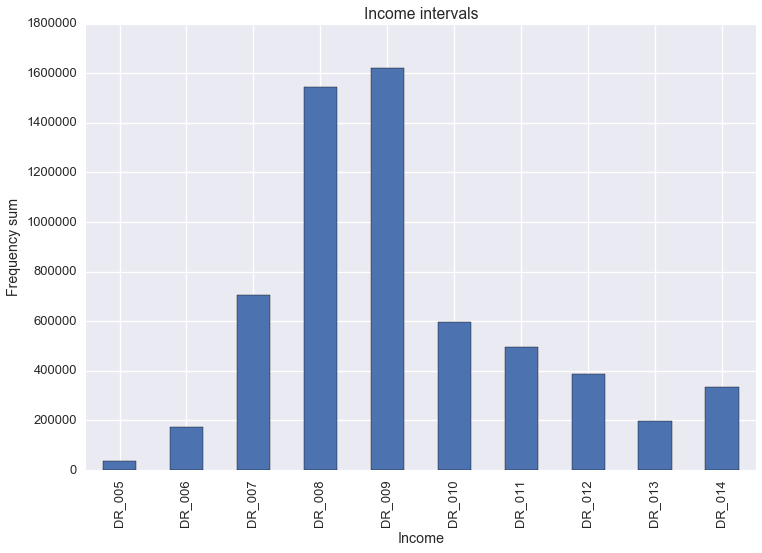

In [15]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Income')
plt.ylabel('Frequency sum')
plt.title('Income intervals')

income.sum().plot(kind='bar')

#### Income variables reference

<prep>
```
|DR_005|Up to 1/8 minimum wage
|DR_006|1/8 to 1/4 minimum wage
|DR_007|1/4 to 1/2 minimum wage
|DR_008|1/2 to 1 minimum wage
|DR_009|1 to 2 minimum wages
|DR_010|2 to 3 minimum wages
|DR_011|3 to 5 minimum wages
|DR_012|5 to 10 minimum wages
|DR_013|More than 10 minimum wages
|DR_014|No income
```
<prep>

Groups to be defined.
Probably: up to ¼ m.w.; ¼ to ½; ½ to 1; 1 to 3, 3 to 5, more than 5.

## Color or Race in function of frequency sum

In [16]:
# slice race and color columns and sum
race = dfc.loc[:,'P3_001':'P3_006']
race.sum()

P3_001    19683975.0
P3_002    11574507.0
P3_003     1266344.0
P3_004      348648.0
P3_005     6381433.0
P3_006       19705.0
dtype: float64

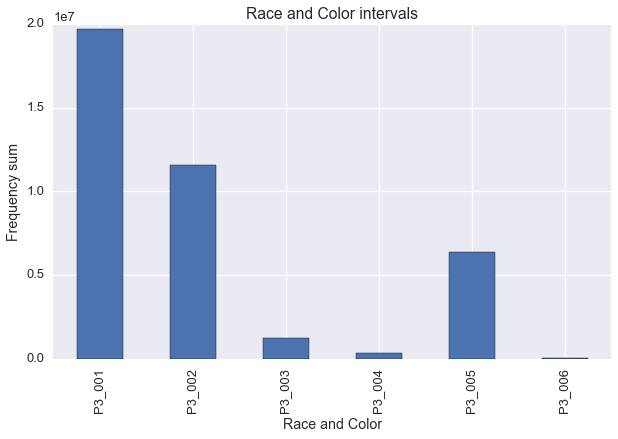

In [17]:
# plot Race and color 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Race and Color')
plt.ylabel('Frequency sum')
plt.title('Race and Color intervals')

race.sum().plot(kind='bar')

#### Race and Color variables reference

<prep>
```
|P3_001| Residents - Pessoas Residentes
|P3_002| White - Brancos
|P3_003| Black - Pretos
|P3_004| Asian - Amarelos
|P3_005| “Pardos” - Pardos
|P3_006| Indígenas - Indígenas
```
<prep>

*Black and “Pardos” will be merged in the same group.

# Weighting Areas data

In [18]:
# Build weighting area dataframe reading csv file exported from shapefile
dataw = "~/Git/Resolution/AP2010_CEM_RMSP_EGP_EDU.csv"
dfw = pd.read_csv(dataw)
dfw.head()

,ID,AREA,AP2010,FIRST_COD_,NOM_GR,FIRST_COD1,NOM_UF,FIRST_COD2,NOM_ME,FIRST_COD3,...,EGP9,EGP10,EGP11_,EDU1,EDU2,EDU3,EDU4,EDU5,X_coord,Y_coord
0,2,42.52,3503901003002,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,3632,2460,64,9660.0,4634.0,7217.0,3226.0,357.0,367940.72713,7.412201e+06
1,1,3.06,3503901003001,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,1771,1707,28,5659.0,2539.0,3941.0,816.0,187.0,365279.00478,7.413086e+06
2,3,51.24,3503901003003,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,4457,2858,262,12045.0,4600.0,6763.0,1400.0,312.0,362939.24837,7.413987e+06
3,253,131.45,3546801003002,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,3156,2087,98,10017.0,4151.0,5969.0,1518.0,121.0,367854.33935,7.422172e+06
4,252,232.20,3546801003001,3,REGIAO SUDESTE,35,SAO PAULO,3515,METROPOLITANA DE SAO PAULO,35059,...,3785,3008,331,11612.0,4386.0,4545.0,830.0,92.0,375891.18166,7.424998e+06


## Education in function of frequency sum

In [19]:
# slice education columns and sum each column
education = dfw.loc[:,'EDU1':'EDU5']
education.sum()

EDU1    6628402.0
EDU2    3185620.0
EDU3    4625504.0
EDU4    2232298.0
EDU5     194757.0
dtype: float64

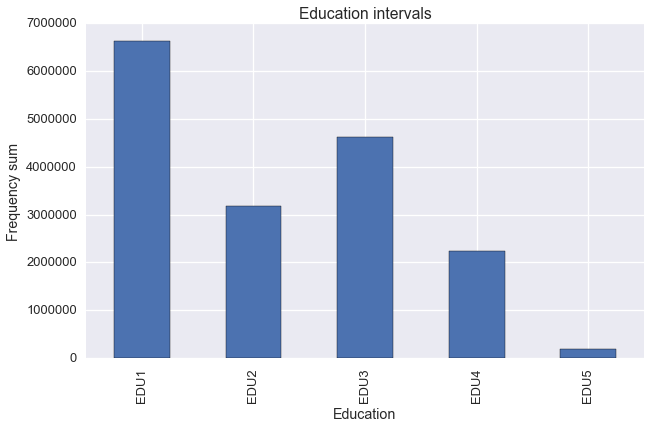

In [20]:
# plot education
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Education')
plt.ylabel('Frequency sum')
plt.title('Education intervals')

education.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EDU1| No education and incomplete elementary school - Sem instrução ou fundamental incompleto
|EDU2| Complete elementary school and incomplete high school - Fundamental completo e médio incompleto
|EDU3| Complete high school and incomplete college - Médio completo e superior incompleto
|EDU4| Complete College/University - Superior Completo
|EDU5| Not determined - Não determinado 
```
<prep>

## Ocupation in function of frequency sum

In [21]:
# slice ocupation columns and sum each column
ocupation = dfw.loc[:,'EGP1':'EGP11_']
ocupation.sum()

EGP1       954344
EGP2       873560
EGP3      1016154
EGP4      1461545
EGP5       187259
EGP6         1342
EGP7        21355
EGP8       332364
EGP9      2088229
EGP10     1467366
EGP11_      25704
dtype: int64

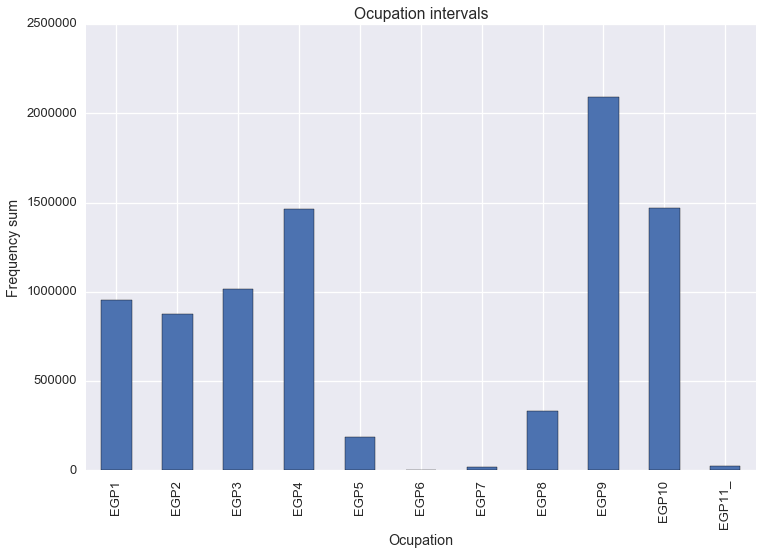

In [22]:
# plot ocupation
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Ocupation')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')

ocupation.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EGP1| I. Higher professionals
|EGP2| II. Lower professionals
|EGP3| IIIa. Routine non-manuals, higher degree
|EGP4| IIIb. Routine non-manual, lower degree
|EGP5| IVa2. Proprietors and employers 
|EGP6| IVc1. Rural employers
|EGP7| IVc2. Self-employed farmers and subsistence agriculture workers
|EGP8| V. Technicians and Supervisors of manual workers
|EGP9| VI. Skilled workers
|EGP10| VIIa. Semi- and unskilled workers
|EGP11| VIIb. Agricultural workers
```
<prep>

[SS] Classes EGP6, EGP7 and EGP11 could be grouped in Agricultural workers